# Mount and Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/My Drive/Few-Shot Project/

/content/drive/.shortcut-targets-by-id/1kJ6hvD4S-gF34kZ670rDNwU-KvWnQSXg/Few-Shot Project


In [3]:
!pip install SimpleITK -q
!pip install sacred==0.7.5

     |████████████████████████████████| 48.4 MB 34 kB/s 
     |████████████████████████████████| 92 kB 220 kB/s 
     |████████████████████████████████| 99 kB 4.7 MB/s 
     |████████████████████████████████| 67 kB 3.7 MB/s 
  Created wheel for jsonpickle: filename=jsonpickle-0.9.6-py3-none-any.whl size=29479 sha256=f6bc04d05d5ac9ecf6790bf9d5b552d8b81e1409b751ccbe73c8d99c3859d1a7
  Stored in directory: /root/.cache/pip/wheels/00/ca/bb/3f8f249a9caf7590412d0c0abe1122a809a46f6930751bb50b
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=94447842f3222c3974a181af9fcf34c6af30a76a41bf53b6c5e71c345981cf1d
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
Successfully built jsonpickle py-cpuinfo


In [4]:
import glob
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import SimpleITK as sitk

# Code Base

In [5]:
class Patient:
    def __init__(self, id_):
        self.id = id_
        self.frames_count = None
        self.fgmasks = None
        self.images = None
        self.labels = None
        self.superpixs = None

    def remove_without_labels(self):
        idx = []
        for frame_number, label in enumerate(self.labels):
            if label.max() > 0:
              idx.append(frame_number)
        self.frames_count = len(idx)
        self.fgmasks = self.fgmasks[idx]
        self.images = self.images[idx]
        self.labels = self.labels[idx]
        self.superpixs = self.superpixs[idx]
        


    def print_data_shapes(self):
        print('patient ', self.id)
        print('fmgasks: ', self.fgmasks.shape)
        print('images: ', self.images.shape)
        print('lables: ', self.labels.shape)
        print('superpixs: ', self.superpixs.shape)
        print('-' * 30)

    def plot(self, frame_number):
        fig , (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 15))
        ax1.imshow(self.images[frame_number], origin='lower', cmap='gray')
        ax2.imshow(self.fgmasks[frame_number], origin='lower', cmap='gray')
        ax3.imshow(self.labels[frame_number], origin='lower', cmap='gray')
        ax4.imshow(self.superpixs[frame_number], origin='lower', cmap='gray')
        ax1.set_title("image")
        ax2.set_title("fgmask")
        ax3.set_title("lable")
        ax4.set_title("superpix")


def create_patients(ids):
    patients = {}
    for id_ in ids:
        patients[id_] = Patient(id_)
    return patients


In [6]:
def save_patients_images(path):
  images = {}
  for id, patient in patients.items():
    images[id]=patient.images
  with open(path, 'wb') as f:
    pickle.dump(images, f)


def save_patients_superpixs(path):
  superpixs = {}
  for id, patient in patients.items():
    superpixs[id]=patient.superpixs
  with open(path, 'wb') as f:
    pickle.dump(superpixs, f)

In [7]:
def read_nii_bysitk(input_fid, peel_info=False):
    """ read nii to numpy through simpleitk
        peelinfo: taking direction, origin, spacing and metadata out
    """
    img_obj = sitk.ReadImage(input_fid)
    img_np = sitk.GetArrayFromImage(img_obj)
    if peel_info:
        info_obj = {
            "spacing": img_obj.GetSpacing(),
            "origin": img_obj.GetOrigin(),
            "direction": img_obj.GetDirection(),
            "array_size": img_np.shape
        }
        return img_np, info_obj
    else:
        return img_np

# Runner

## Read Data

In [8]:
patient_ids = [1, 2, 3, 5, 8, 10, 13, 15, 19, 20, 21, 22, 31, 32, 33, 34, 36, 37, 38, 39]
data_root = './SSL_ALPNet/data/CHAOST2/chaos_MR_T2_normalized/'

patients = create_patients(patient_ids)

for path in tqdm(glob.iglob(data_root + '**/*.nii.gz', recursive=True), desc="Reading"):
    id_ = int(path.split('_')[-1].split('.')[0])
    patient = patients.get(id_)
    obj = read_nii_bysitk(path)
    if 'fgmask' in path:
        patient.fgmasks = obj
        patient.frames_count = obj.shape[0]
    elif 'image' in path:
        patient.images = obj
    elif 'label' in path:
        patient.labels = obj
    elif 'superpix' in path:
        patient.superpixs = obj

patients


Reading: 80it [00:34,  2.32it/s]


{1: <__main__.Patient at 0x7f1af1118e50>,
 2: <__main__.Patient at 0x7f1b073fc110>,
 3: <__main__.Patient at 0x7f1af1118e90>,
 5: <__main__.Patient at 0x7f1af1118ed0>,
 8: <__main__.Patient at 0x7f1af1118f10>,
 10: <__main__.Patient at 0x7f1af1118f50>,
 13: <__main__.Patient at 0x7f1af1118f90>,
 15: <__main__.Patient at 0x7f1af1118fd0>,
 19: <__main__.Patient at 0x7f1af120a050>,
 20: <__main__.Patient at 0x7f1af120a090>,
 21: <__main__.Patient at 0x7f1af120a0d0>,
 22: <__main__.Patient at 0x7f1af120a110>,
 31: <__main__.Patient at 0x7f1af120a150>,
 32: <__main__.Patient at 0x7f1af120a190>,
 33: <__main__.Patient at 0x7f1af120a1d0>,
 34: <__main__.Patient at 0x7f1af120a210>,
 36: <__main__.Patient at 0x7f1af120a250>,
 37: <__main__.Patient at 0x7f1af120a290>,
 38: <__main__.Patient at 0x7f1af120a2d0>,
 39: <__main__.Patient at 0x7f1af120a310>}

## Visualize

In [10]:
for id, patient in patients.items():
    print(id, "-->", patient.frames_count)
print()

patient_id = 5
patients.get(patient_id).print_data_shapes()

1 --> 37
2 --> 31
3 --> 36
5 --> 36
8 --> 34
10 --> 36
13 --> 36
15 --> 31
19 --> 36
20 --> 31
21 --> 33
22 --> 38
31 --> 34
32 --> 46
33 --> 34
34 --> 35
36 --> 45
37 --> 38
38 --> 40
39 --> 31

patient  5
fmgasks:  (36, 256, 256)
images:  (36, 256, 256)
lables:  (36, 256, 256)
superpixs:  (36, 256, 256)
------------------------------


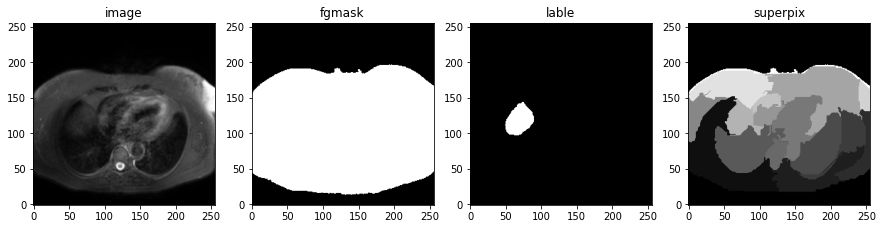

In [13]:
patients.get(patient_id).plot(32)

## Select only frames with label

In [ ]:
# remove frames without label (remove very early or very late frames)
for patient in patients.values():
    patient.remove_without_labels()

for id, patient in patients.items():
    print(id, "-->", patient.frames_count)
print()

1 --> 24
2 --> 27
3 --> 25
5 --> 28
8 --> 30
10 --> 25
13 --> 33
15 --> 30
19 --> 29
20 --> 28
21 --> 22
22 --> 30
31 --> 23
32 --> 35
33 --> 31
34 --> 29
36 --> 27
37 --> 28
38 --> 28
39 --> 26



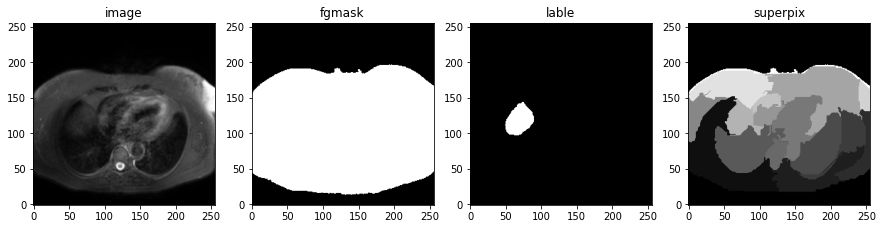

In [ ]:
patients.get(patient_id).plot(27)

## save structured data

In [15]:
# dump
# with open('./structured-data/patients.pkl', 'wb') as f:
#     pickle.dump(patients, f)

save_patients_images('./structured-data/patients_images.pkl')
# save_patients_superpixs('./patients_superpixs.pkl')

## load structured data

In [ ]:
# load
with open('./structured_data/patients_images.pkl', 'rb') as f:
    patients = pickle.load(f)